In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor,KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [14]:
fly=pd.read_csv('Data_Train.csv')

In [15]:
fly.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [16]:
df=pd.DataFrame(data=fly)
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [17]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['Price'], dtype='object'),
 dtype('O'): Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
        'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
        'Additional_Info'],
       dtype='object')}

In [19]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [20]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

df.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [22]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [23]:
df['Route_1']=df['Route'].str.split('→').str[0]
df['Route_2']=df['Route'].str.split('→').str[1]
df['Route_3']=df['Route'].str.split('→').str[2]
df['Route_4']=df['Route'].str.split('→').str[3]
df['Route_5']=df['Route'].str.split('→').str[4]
df.drop('Route',axis=1,inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,NaN,NaN


In [25]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)

In [26]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None


In [27]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]

In [28]:
df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,05,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,09,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,05
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50


In [29]:
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)

df.drop('Dep_Time',axis=1,inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50


In [31]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

In [32]:
df['Arri_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arri_Minute']=df['Arrival_Time'].str.split(':').str[1]

df['Arri_Hour']=df['Arri_Hour'].astype(int)
df['Arri_Minute']=df['Arri_Minute'].astype(int) 
df.drop('Arrival_Time',axis=1,inplace=True)

In [33]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arri_Hour,Arri_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35


In [34]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [35]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stops')

In [36]:
df['Stop']=df['Total_Stops'].str.split(' ').str[0]
df.drop('Total_Stops',axis=1,inplace=True)

In [37]:
df.head()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arri_Hour,Arri_Minute,Stop
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897,24,03,2019,BLR,DEL,None,None,None,22,20,1,10,0
1,Air India,Kolkata,Banglore,7h 25m,No info,7662,1,05,2019,CCU,IXR,BBI,BLR,None,5,50,13,15,2
2,Jet Airways,Delhi,Cochin,19h,No info,13882,9,06,2019,DEL,LKO,BOM,COK,None,9,25,4,25,2
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218,12,05,2019,CCU,NAG,BLR,None,None,18,5,23,30,1
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302,01,03,2019,BLR,NAG,DEL,None,None,16,50,21,35,1


In [38]:
df.tail()

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arri_Hour,Arri_Minute,Stop
10678,Air Asia,Kolkata,Banglore,2h 30m,No info,4107,9,04,2019,CCU,BLR,None,None,None,19,55,22,25,0
10679,Air India,Kolkata,Banglore,2h 35m,No info,4145,27,04,2019,CCU,BLR,None,None,None,20,45,23,20,0
10680,Jet Airways,Banglore,Delhi,3h,No info,7229,27,04,2019,BLR,DEL,None,None,None,8,20,11,20,0
10681,Vistara,Banglore,New Delhi,2h 40m,No info,12648,01,03,2019,BLR,DEL,None,None,None,11,30,14,10,0
10682,Air India,Delhi,Cochin,8h 20m,No info,11753,9,05,2019,DEL,GOI,BOM,COK,None,10,55,19,15,2


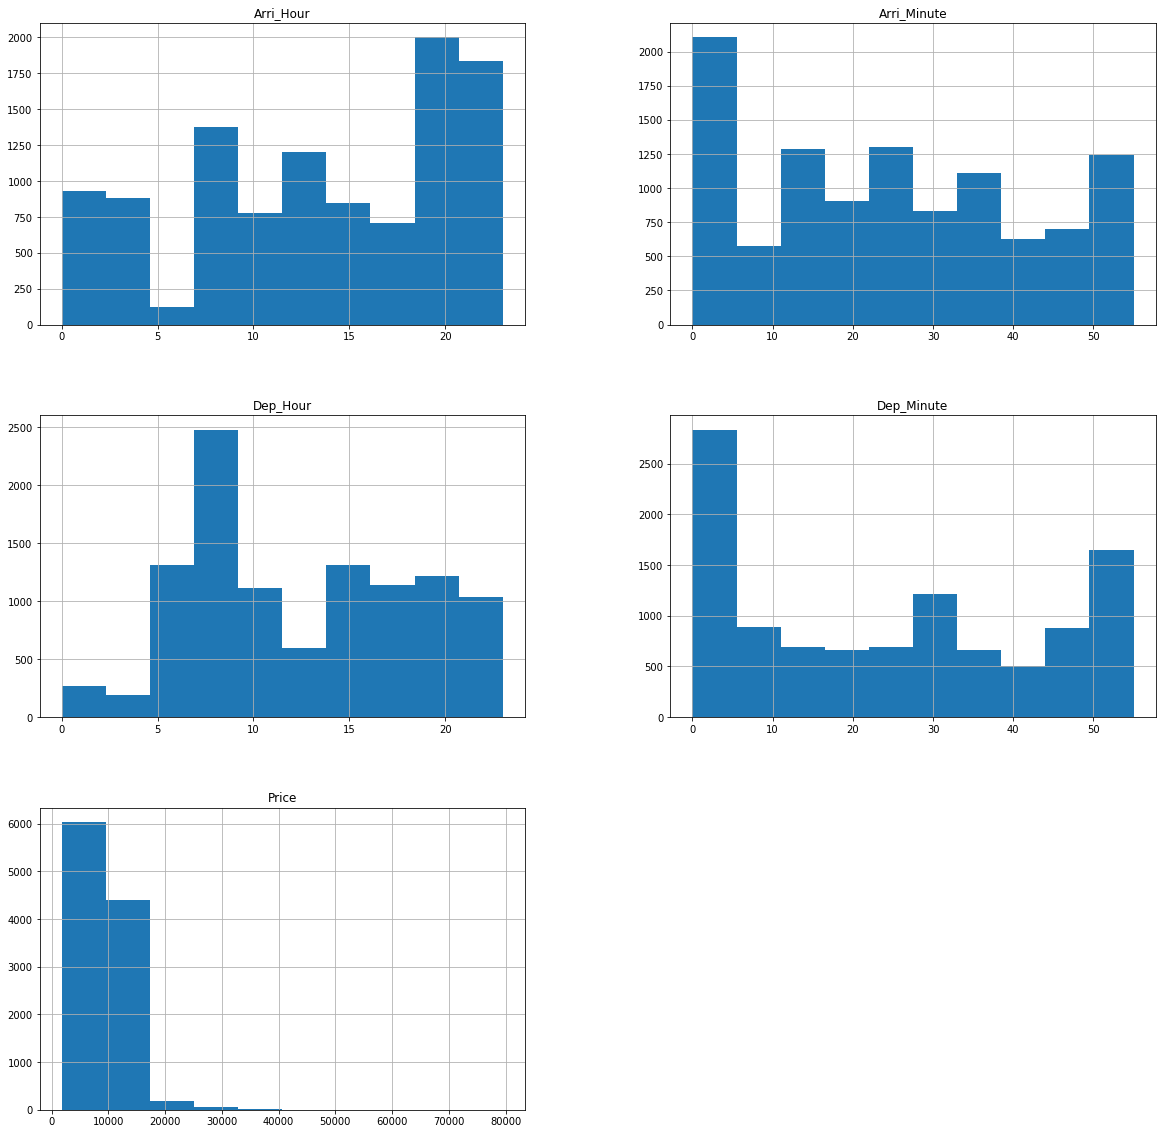

In [39]:
df.hist(figsize=(20,20))
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x23b595a3588>,
 'caps': [<matplotlib.lines.Line2D at 0x23b5959c488>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b5937e808>],
 'medians': [<matplotlib.lines.Line2D at 0x23b595aa288>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b59667c48>],
 'means': []}

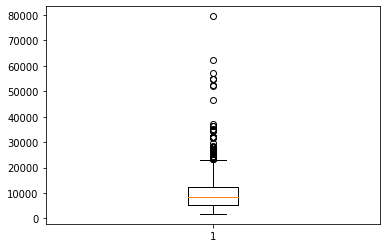

In [146]:
plt.boxplot(df['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23b596676c8>,
 'caps': [<matplotlib.lines.Line2D at 0x23b59610b88>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b5963a788>],
 'medians': [<matplotlib.lines.Line2D at 0x23b595a8e08>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b595a2d08>],
 'means': []}

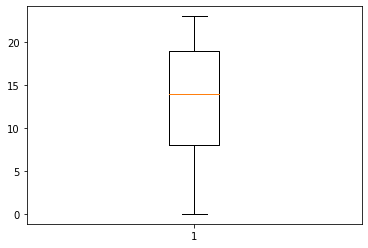

In [147]:
plt.boxplot(df['Arri_Hour'])

{'whiskers': [<matplotlib.lines.Line2D at 0x23b5962eec8>,
 'caps': [<matplotlib.lines.Line2D at 0x23b595d5cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x23b59ce4848>],
 'medians': [<matplotlib.lines.Line2D at 0x23b59620f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x23b595da488>],
 'means': []}

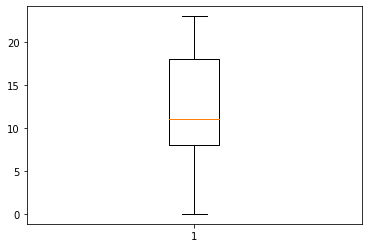

In [148]:
plt.boxplot(df['Dep_Hour'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23b599b61c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23b599b77c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x23b59b1fe48>,
 'cbars': <matplotlib.collections.LineCollection at 0x23b59b22088>}

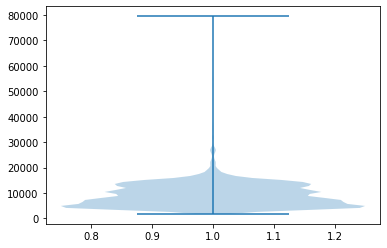

In [149]:
plt.violinplot(df['Price'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23b59d56ec8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23b59d53688>,
 'cmins': <matplotlib.collections.LineCollection at 0x23b59d56d48>,
 'cbars': <matplotlib.collections.LineCollection at 0x23b59d56d88>}

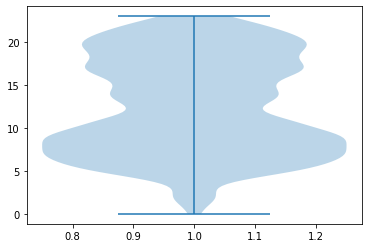

In [152]:
plt.violinplot(df['Dep_Hour'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x23b59d84c48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x23b59d82cc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x23b59d84b88>,
 'cbars': <matplotlib.collections.LineCollection at 0x23b59d841c8>}

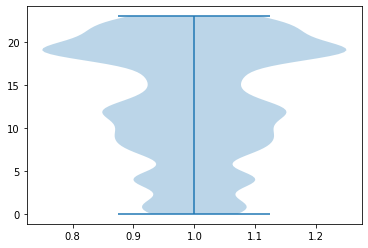

In [153]:
plt.violinplot(df['Arri_Hour'])

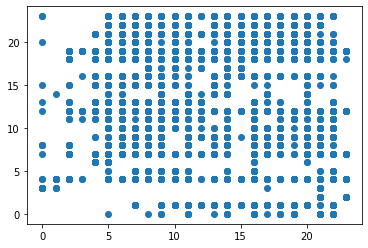

In [154]:
plt.scatter('Dep_Hour','Arri_Hour',data=df)

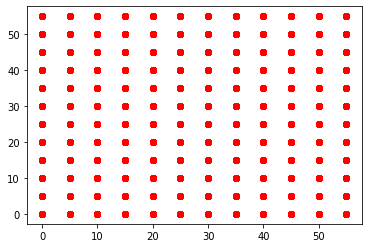

In [155]:
plt.scatter('Dep_Minute','Arri_Minute',c='r',data=df)

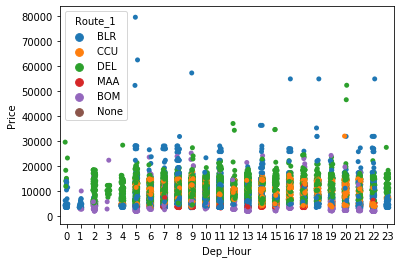

In [157]:
sns.stripplot('Dep_Hour','Price',hue='Route_1',data=df)

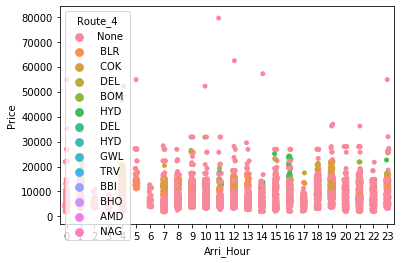

In [158]:
sns.stripplot('Arri_Hour','Price',hue='Route_4',data=df)

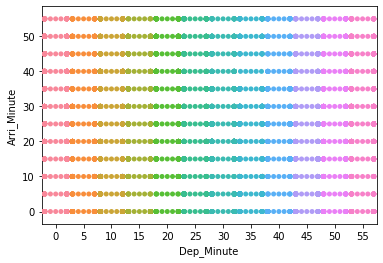

In [159]:
sns.swarmplot('Dep_Minute','Arri_Minute',data=df)

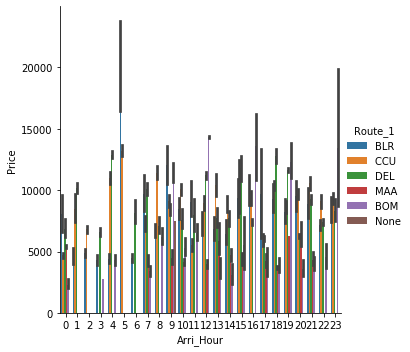

In [162]:
sns.catplot('Arri_Hour','Price',hue='Route_1',data=df,kind='bar')

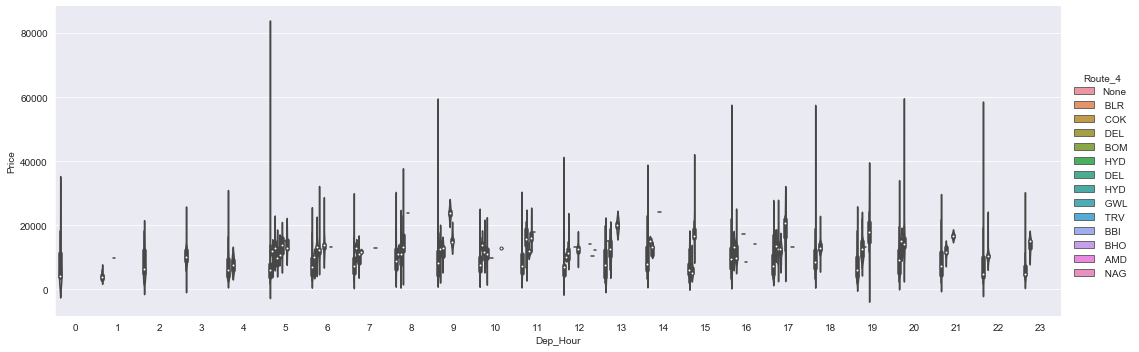

In [163]:
sns.set_style('darkgrid')
sns.catplot('Dep_Hour','Price',hue='Route_4',aspect=3,data=df,kind='violin')

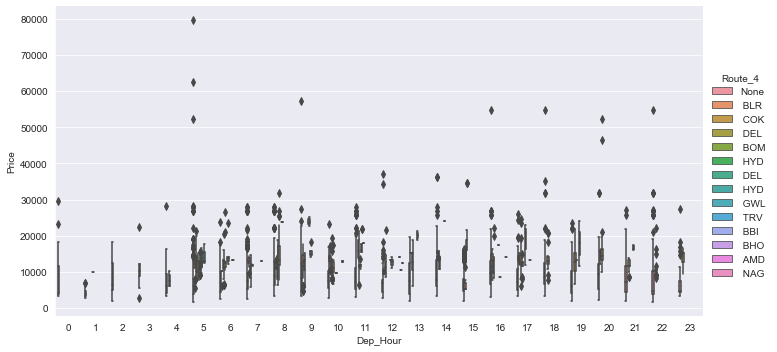

In [165]:
sns.catplot('Dep_Hour','Price',hue='Route_4',height=5,aspect=2,data=df,kind='box')

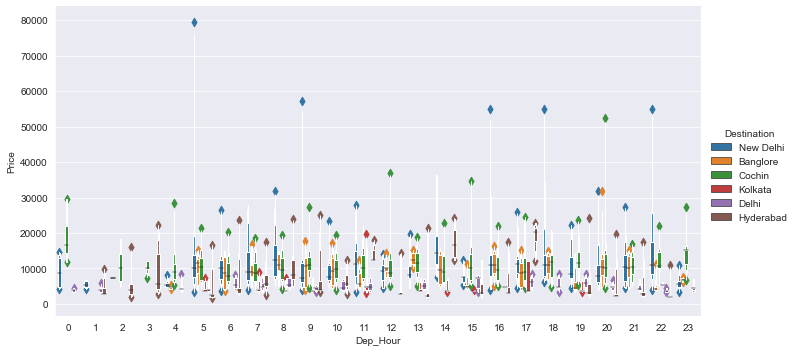

In [166]:
sns.catplot('Dep_Hour','Price',hue='Destination',height=5,aspect=2,data=df,kind='boxen')

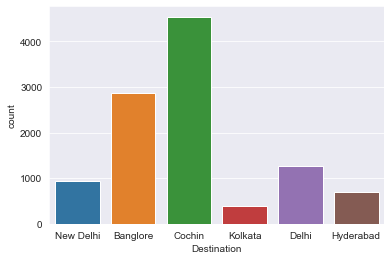

In [167]:
sns.countplot(df['Destination'])

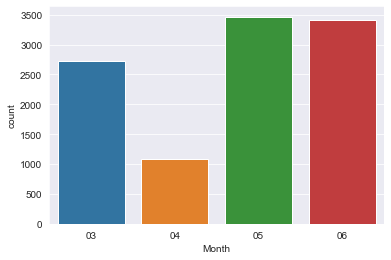

In [169]:
sns.countplot(df['Month'])

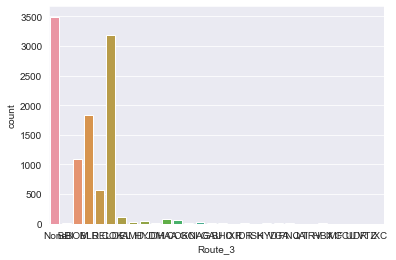

In [170]:
sns.countplot(df['Route_3'])

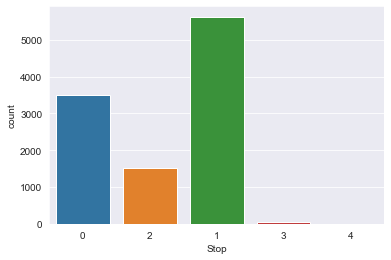

In [172]:
sns.countplot(df['Stop'])

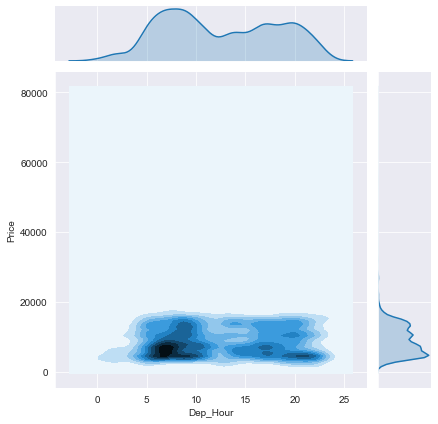

In [173]:
sns.jointplot('Dep_Hour','Price',height=6,ratio=5,space=.2,data=df,kind='kde')

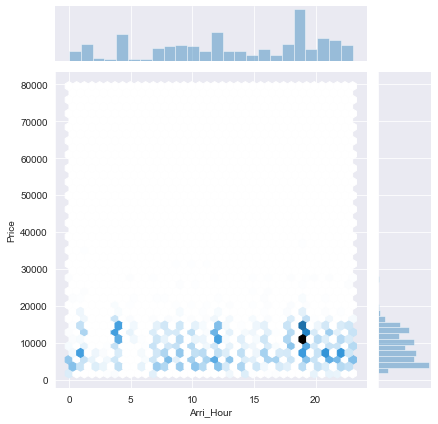

In [174]:
sns.jointplot('Arri_Hour','Price',height=6,ratio=5,space=.2,data=df,kind='hex')

In [150]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int32'): Index(['Dep_Hour', 'Dep_Minute', 'Arri_Hour', 'Arri_Minute'], dtype='object'),
 dtype('int64'): Index(['Price'], dtype='object'),
 dtype('O'): Index(['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info',
        'Date', 'Month', 'Year', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
        'Route_5', 'Stop'],
       dtype='object')}

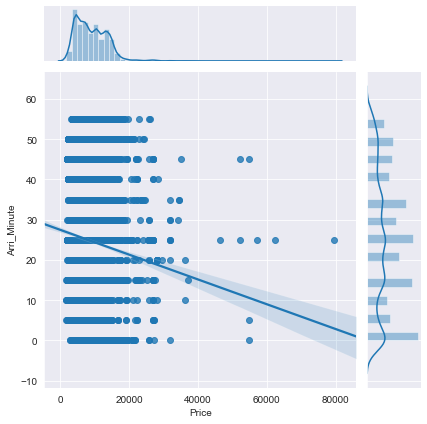

In [177]:
sns.jointplot('Price','Arri_Minute',height=6,ratio=5,space=.2,data=df,kind='reg')

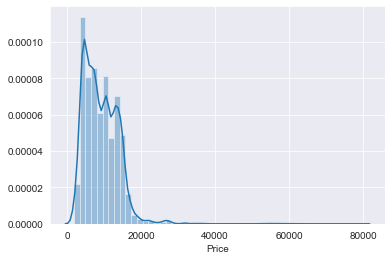

In [178]:
sns.distplot(df['Price'])

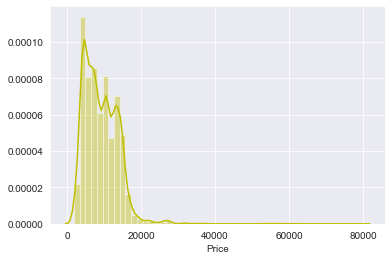

In [179]:
sns.distplot(df['Price'],color='y')

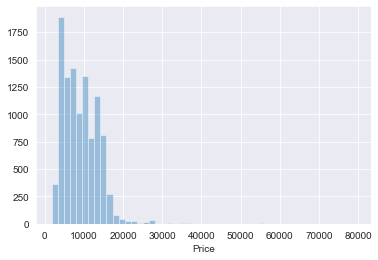

In [180]:
sns.distplot(df['Price'],kde=False)

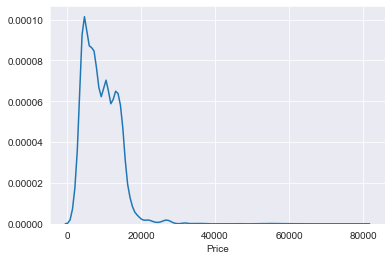

In [181]:
sns.distplot(df['Price'],hist=False)

In [40]:
df.shape

(10683, 19)

In [41]:
df.drop('Duration',axis=1,inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
Airline            10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
Date               10683 non-null object
Month              10683 non-null object
Year               10683 non-null object
Route_1            10683 non-null object
Route_2            10683 non-null object
Route_3            10683 non-null object
Route_4            10683 non-null object
Route_5            10683 non-null object
Dep_Hour           10683 non-null int32
Dep_Minute         10683 non-null int32
Arri_Hour          10683 non-null int32
Arri_Minute        10683 non-null int32
Stop               10682 non-null object
dtypes: int32(4), int64(1), object(13)
memory usage: 1.3+ MB


In [43]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
Dep_Hour           0
Dep_Minute         0
Arri_Hour          0
Arri_Minute        0
Stop               1
dtype: int64

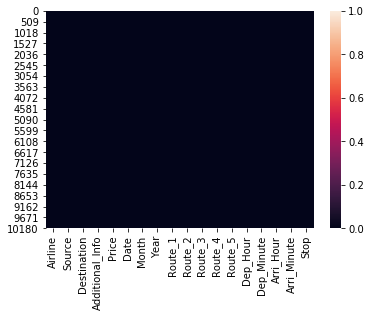

In [44]:
sns.heatmap(df.isnull())

In [45]:
df.dropna(axis=0,how='any',inplace=True)

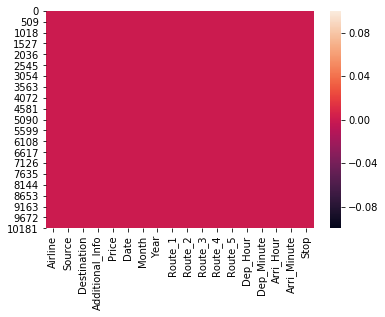

In [46]:
sns.heatmap(df.isnull())

In [47]:
df.shape

(10682, 18)

In [48]:
df.describe()

,Price,Dep_Hour,Dep_Minute,Arri_Hour,Arri_Minute
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.491013,24.409287,13.349186,24.690601
std,4611.548810,5.748820,18.767801,6.859317,16.506808
min,1759.000000,0.000000,0.000000,0.000000,0.000000
25%,5277.000000,8.000000,5.000000,8.000000,10.000000
50%,8372.000000,11.000000,25.000000,14.000000,25.000000
75%,12373.000000,18.000000,40.000000,19.000000,35.000000
max,79512.000000,23.000000,55.000000,23.000000,55.000000


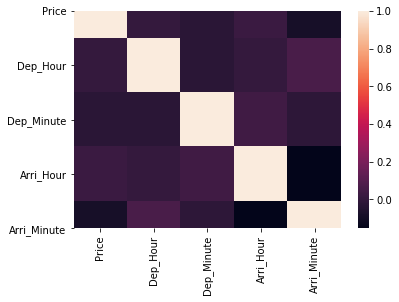

In [49]:
sns.heatmap(df.corr())

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()

In [52]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int32'): Index(['Dep_Hour', 'Dep_Minute', 'Arri_Hour', 'Arri_Minute'], dtype='object'),
 dtype('int64'): Index(['Price'], dtype='object'),
 dtype('O'): Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
        'Year', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5', 'Stop'],
       dtype='object')}

In [53]:
df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df['Additional_Info']=le.fit_transform(df['Additional_Info'])
df['Route_1']=le.fit_transform(df['Route_1'])
df['Route_2']=le.fit_transform(df['Route_2'])
df['Route_3']=le.fit_transform(df['Route_3'])
df['Route_4']=le.fit_transform(df['Route_4'])
df['Route_5']=le.fit_transform(df['Route_5'])
df['Stop']=le.fit_transform(df['Stop'])

In [54]:
df.describe()

,Airline,Source,Destination,Additional_Info,Price,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arri_Hour,Arri_Minute,Stop
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,7.392998,9087.214567,2.019378,11.897959,13.232166,11.792080,4.983056,12.491013,24.409287,13.349186,24.690601,0.824190
std,2.352090,1.177276,1.474845,1.214254,4611.548810,1.206239,8.006427,11.302632,2.948124,0.263913,5.748820,18.767801,6.859317,16.506808,0.675229
min,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,8.000000,5277.000000,1.000000,7.000000,4.000000,13.000000,5.000000,8.000000,5.000000,8.000000,10.000000,0.000000
50%,4.000000,2.000000,1.000000,8.000000,8372.000000,2.000000,8.000000,6.000000,13.000000,5.000000,11.000000,25.000000,14.000000,25.000000,1.000000
75%,4.000000,3.000000,2.000000,8.000000,12373.000000,3.000000,14.000000,29.000000,13.000000,5.000000,18.000000,40.000000,19.000000,35.000000,1.000000
max,11.000000,4.000000,5.000000,9.000000,79512.000000,4.000000,44.000000,29.000000,13.000000,5.000000,23.000000,55.000000,23.000000,55.000000,4.000000


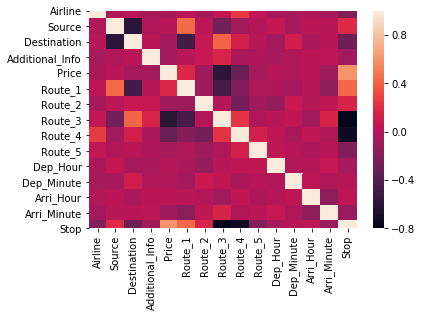

In [55]:
sns.heatmap(df.corr())

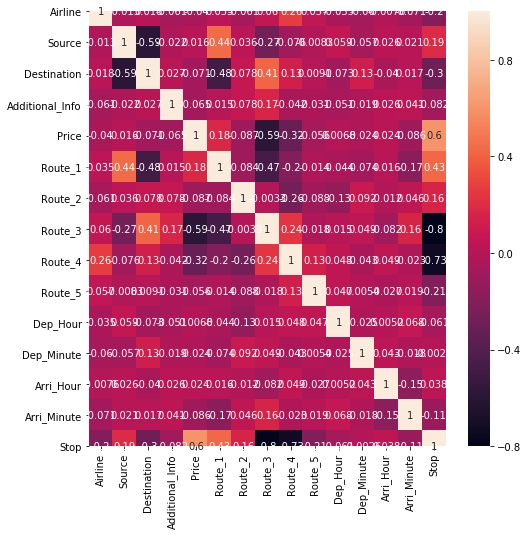

In [56]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

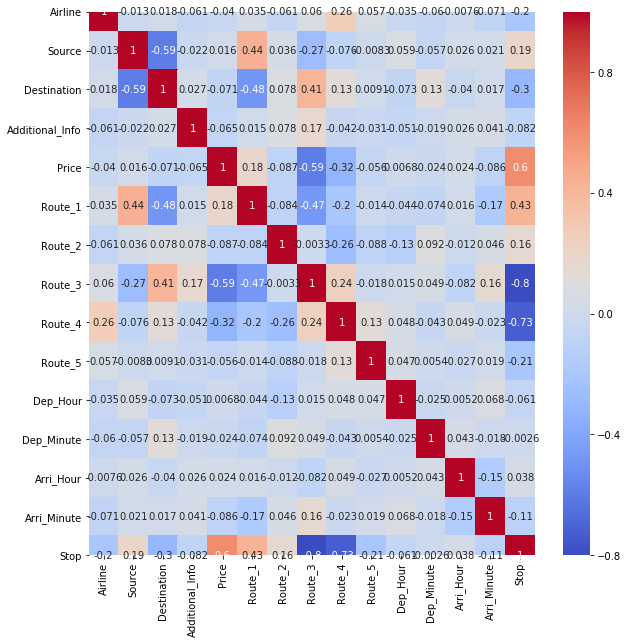

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [58]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arri_Hour,Arri_Minute,Stop
0,3,0,5,8,3897,24,03,2019,0,13,29,13,5,22,20,1,10,0
1,1,3,0,8,7662,1,05,2019,2,25,1,3,5,5,50,13,15,2
2,4,2,1,8,13882,9,06,2019,3,32,4,5,5,9,25,4,25,2
3,3,3,0,8,6218,12,05,2019,2,34,3,13,5,18,5,23,30,1
4,3,0,5,8,13302,01,03,2019,0,34,8,13,5,16,50,21,35,1


In [59]:
x=df.drop('Price',axis=1)
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Year,Route_1,Route_2,Route_3,Route_4,Route_5,Dep_Hour,Dep_Minute,Arri_Hour,Arri_Minute,Stop
0,3,0,5,8,24,03,2019,0,13,29,13,5,22,20,1,10,0
1,1,3,0,8,1,05,2019,2,25,1,3,5,5,50,13,15,2
2,4,2,1,8,9,06,2019,3,32,4,5,5,9,25,4,25,2
3,3,3,0,8,12,05,2019,2,34,3,13,5,18,5,23,30,1
4,3,0,5,8,01,03,2019,0,34,8,13,5,16,50,21,35,1


In [60]:
y=df['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [61]:
models=[KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]

In [62]:
max_r2_score=0
for r_state in range(40,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        r2_value=r2_score(y_test,predm)
        print('R2 score correspond to random state',r_state ,'is',r2_value)
        if r2_value>max_r2_score:
            max_r2_score=r2_value
            final_state=r_state
            final_model=m
print()
print()
print()
print('Maximum R2 score correspond to random state',final_state,'is',max_r2_score,'and models is',final_model)

R2 score correspond to random state 40 is 0.6417806095043201
R2 score correspond to random state 40 is 0.8017789035304639
R2 score correspond to random state 40 is 0.859368836813605
R2 score correspond to random state 41 is 0.6457803319958241
R2 score correspond to random state 41 is 0.7786686381507824
R2 score correspond to random state 41 is 0.8436254523706188
R2 score correspond to random state 42 is 0.6534261392705139
R2 score correspond to random state 42 is 0.8303423232488226
R2 score correspond to random state 42 is 0.9053974906127317
R2 score correspond to random state 43 is 0.6825128249162258
R2 score correspond to random state 43 is 0.7950916365266402
R2 score correspond to random state 43 is 0.8622020131335819
R2 score correspond to random state 44 is 0.6624708315174814
R2 score correspond to random state 44 is 0.8425947260797093
R2 score correspond to random state 44 is 0.9083522441327903
R2 score correspond to random state 45 is 0.6190419239408027
R2 score correspond to ra

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=44)

In [64]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 Score:',r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(mean_absolute_error(y_test,predrf))
print(np.sqrt(mean_absolute_error(y_test,predrf)))

R2 Score: 0.9091361519827084
2002456.0201166219
692.9974564015313
26.324844850474072


In [65]:
from sklearn.model_selection import GridSearchCV

In [67]:
# i am choosing RandomForestRegressor model for hyper tuening 
parameter={'n_estimators':range(10,20),'criterion':('mse','mae')}
grid=GridSearchCV(rf,parameter)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'criterion': 'mse', 'n_estimators': 17}


In [68]:
rf=RandomForestRegressor(criterion='mse',n_estimators=17)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('R2 Score:',r2_score(y_test,predrf))
print(mean_squared_error(y_test,predrf))
print(mean_absolute_error(y_test,predrf))
print(np.sqrt(mean_absolute_error(y_test,predrf)))

R2 Score: 0.9200451643583697
1762043.3809665332
656.0117390895108
25.612726115927426


In [69]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.89633331 0.89446472 0.8827317  0.90792147 0.9035221 ]
0.8969946592343587
0.0086287048462115


In [213]:
from sklearn.externals import joblib

In [214]:
joblib.dump(rf,'FlightPriceFile.obj')

['FlightPriceFile.obj']